<H1>Projet Machine Learning - Fake News</H1>

<H3>Albena Stefanova (22109542) - Gauthier Germain (21501688) - Maxime Ginda (22114440) - Benjamin Villa (22110753) - Pierre Hennecart (22107715) (M1 IMAGINE)</H3>

Ce projet s'inscrit dans le contexte de l'apprentissage supervisé. Nous avons pour objectif de permettre une prédiction si des assertions sont vraies ou fausses. 

Nous avons réparti notre travail en 4 étapes :


*   **Installation**
*   **Prétraitement**
*   **Classification**
*   **Analyse**



<H3>Utilisation du Notebook :</H3>

*    Exécuter les cellules dans la partie **Installation** et celles dans **Classes et fonctions utilitaires**
*    Le coeur de la chaîne de classification se fait dans la fonction **RunExperimentation** et doit êt qui effectue les opérations de prétraitement et de recherche du meilleur classifieur. Elle enregistre alors le modèle dans un fichier externe réutilisable dans d'autres cellules pour réaliser des prédictions.
*    Choisir la **tâche de classification** (TRUE vs FALSE, (TRUE or FALSE) vs MIXTURE, TRUE vs FALSE vs MIXTURE) et exécuter les deux cellules à l'intérieur pour effectuer cette chaîne de classification et de prédiction
* La partie **Analyse des différents prétraitements** a été utilisée pour comparer de manière empirique les scores de notre modèle selon différents paramètres de prétraitement et différents classifieur pour inclure dans le rapport

# **Installation**

En premier lieu, il faut importer les différentes librairies utilisées. Nous regroupons tous les imports nécessaires dans la section suivante.

In [35]:
# Importation des différentes librairies utiles pour le notebook

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Affiche tout l'output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np
from datetime import datetime as dt
import pickle
from tabulate import tabulate

# NLTK
# !pip install autocorrect
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
from autocorrect import Speller
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 
tag_set = ['LS', 'TO', 'VBN', "''", 'WP', 'UH', 'VBG', 'JJ', 'VBZ', '--', 'VBP', 'NN', 'DT', 'PRP', ':', 'WP$', 'NNPS', 'PRP$', 'WDT', '(', ')', '.', ',', '``', '$', 'RB', 'RBR', 'RBS', 'VBD', 'IN', 'FW', 'RP', 'JJR', 'JJS', 'PDT', 'MD', 'VB', 'WRB', 'NNP', 'EX', 'NNS', 'SYM', 'CC', 'CD', 'POS']
spell = Speller(lang='en')

# Solit des données et Upsampling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Classification de données textuelles
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


# librairies NLTK
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize 

 
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('omw-1.4')
# stop_words = set(stopwords.words('english')) 

# Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import time

# ColumnTransformer et FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer

!export PATH=/Library/TeX/texbin:$PATH

[nltk_data] Downloading package wordnet to /home/axiom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to /home/axiom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /home/axiom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/axiom/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## **Google Colab**

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
# my_local_drive='/content/gdrive/My Drive/MachineLearning/ML_FDS'
# # Ajout du path pour les librairies, fonctions et données
# sys.path.append(my_local_drive)
# # Se positionner sur le répertoire associé
# %cd $my_local_drive

# %pwd

# **Classes et fonctions utilitaires**

In [2]:
from MyNLPUtilities import *

In [3]:
# fonction qui affiche le classification report et la matrice de confusion
def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("F1 score : %0.3f"%(f1_score(y_test, y_pred, average='macro')))
  print("\n")
  print(classification_report(y_test,y_pred,digits=5))    
  print("Classification Report")

  # print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  # plot_confusion_matrix(cnf_matrix, classes)
  plot_confusion_matrix(cnf_matrix, [Rating(classe).name for classe in classes])

In [4]:
#Enum Class
from enum import Enum

class Rating(Enum):
  OTHER = -1
  FALSE = 1
  MIXTURE = 2
  TRUE = 3
  TRUEorFALSE = 4
    
class ClassificationTask(Enum):
    TRUEvsFalse = 1
    TRUEorFALSEvsMIXTURE =2
    TRUEvsFalsevsMIXTURE =3

In [5]:
# Definition custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]
    
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

## **Cleaners et Normalizers**

In [6]:
def TextCleaner(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False, # lematisation des termes 
               filterByWordTags = [], #['NN','VB', 'JJ'] filter morphologiquement
               spellcheck=False
              ):
    
    sentence=str(X)

    # suppresion des liens
    sentence = re.sub(r'http\S+', ' ', sentence)
    sentence = re.sub(r"\ [A-Za-z]*\.com", " ", sentence)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    if spellcheck:
      sentence = spell(sentence)
    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppresion des mots des morphologiques non désirées
    if len(filterByWordTags) != 0:
      word_tag = nltk.pos_tag(words)
      words = []
      allSelectedTags = []
      for selectedTag in filterByWordTags:
        allSelectedTags += [tag for tag in tag_set if selectedTag in tag ]

      for word,tag in word_tag:
        if tag in allSelectedTags:
          words.append(word)

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
      # cas specifique pour les verbes - pour passer en infinitif, 
      # il faut appliquer lemmatizer.lemmatize(word, 'v')
      verb_tags =  ['VB','VBD', 'VBG', 'VBN', 'VBP' ,'VBZ']
      lemmatizer=WordNetLemmatizer()
      word_tag = nltk.pos_tag(words)
      words = []
      # print(word_tag)
      for word,tag in word_tag:
        if tag.startswith('VB'):
          words.append(lemmatizer.lemmatize(word, 'v'))
        else:
          words.append(lemmatizer.lemmatize(word))
    # if getlemmatisation:
    #     lemmatizer=WordNetLemmatizer()
    #     words = [lemmatizer.lemmatize(word)for word in words]
      

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes
                 filterByWordTags = [], #['NN','VB', 'JJ'] filter morphologiquement
                 spellcheck=False
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.filterByWordTags=filterByWordTags
        self.spellcheck=spellcheck

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [TextCleaner(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            filterByWordTags=self.filterByWordTags,
                            spellcheck=self.spellcheck) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'filterByWordTags':self.filterByWordTags
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    

In [7]:
def KeywordsCleaner(X, 
               lowercase=False, # mettre en minuscule
              ):
    
    sentence=str(X)



    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s,]','', sentence)
    # suppression de tous les caractères uniques
    # print(sentence)
    sentence = re.sub(r'\s+[a-zA-Z,]\s+', '', sentence)
    # print(sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)
    # print(sentence)

    tokens = sentence.split(",")

    if lowercase:
          tokens = [token.lower() for token in tokens]
    
    # substitution des espaces
    tokens = [re.sub(r'\s+', '', token, flags=re.I) for token in tokens]

    sentence= ' '.join(tokens)
  
    return sentence

class KeywordsNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self,
                 lowercase=False,# passage en minuscule            
                ):
        
        self.lowercase=lowercase
        

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [KeywordsCleaner(text,lowercase=self.lowercase) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    

In [8]:
def DateCleaner(X):
    
    sentence=str(X)
    if (sentence == 'Unknown'):
        return "-1"
    date = dt.strptime(sentence, '%Y-%m-%d').date()

    return str(date.toordinal())

class DateNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [DateCleaner(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    

## **Fonctions d'évaluation et d'affichage**

In [9]:
# Evaluation des différents pipelines et retourne le meilleur
def pipeline_evaluation_cross_val (all_models):
  results = []
  names = []
  unsorted_scores= []
  for name,model in all_models:
      kfold = KFold(n_splits=10, random_state=42,shuffle=True)
      start_time = time.time()
      # cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
      cv_results = cross_val_score(model, X_train, y_train, cv=5)
      # cv_results = cross_val_score(model, X_train, y_train, cv=kfold)


      #pour avoir les paramètres utilisés dans le modèle enlever commentaire ligne suivante
      results.append(cv_results)
      names.append(name)
      msg = "Accuracy = %0.3f (Ecart-type : %0.3f)" % (cv_results.mean(), cv_results.std())


      print(name+ " : ")
      print ("Time = %0.5f"%(time.time() - start_time),'s')
      print (model.get_params())
      print(msg)
      print(cv_results)
      print("\n")

      unsorted_scores.append((name, cv_results.mean()))

  # Affichage boîte à moustache
  fig = plt.figure()
  fig.suptitle('Comparaison des pipelines')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(names)
  plt.show()

  # Score finaux triés
  scores = sorted(unsorted_scores, key=lambda x: -x[1])
  print (tabulate(scores, floatfmt=".3f", headers=("Pipeline", 'Score')))

  # Affichage de la matrice de confusion du meilleur classifier avec les meilleurs paramètres
  best_pipeline_model =all_models[unsorted_scores.index(scores[0])][1]

  return best_pipeline_model

In [10]:
# Evaluation des différents pipelines et retourne le meilleur
def pipeline_evaluation_GridSearchCV (all_models, X_train, y_train):
  results = []
  names = []
  unsorted_scores= []
  best_params= []


  for name,model,grid_param in all_models:
      kfold = KFold(n_splits=10, random_state=42,shuffle=True)
      # print(type(kfold))
      start_time = time.time()
      gd_sr = GridSearchCV(estimator=model,  
                     param_grid=grid_param,
                     scoring='accuracy',
                    #  cv=kfold,
                     cv=3,
                     n_jobs=-1,
                    return_train_score=True)
      
      gd_sr.fit(X_train, y_train)
      
      results.append(gd_sr.cv_results_['mean_test_score'])
      names.append(name)
        
      print("\n")
      print(name+ " : ")
      print ("Time = %0.5f"%(time.time() - start_time),'s')
      print ('meilleur score %0.3f'%(gd_sr.best_score_),'\n')
      print ('meilleurs paramètres', gd_sr.best_params_,'\n')
      best_params.append(gd_sr)
      # print (gd_sr.get_params())
      

      # print(gd_sr.cv_results_['mean_test_score'])
      unsorted_scores.append((name, gd_sr.cv_results_['mean_test_score'].mean()))

  # Score finaux triés
  scores = sorted(unsorted_scores, key=lambda x: -x[1])
  print (tabulate(scores, floatfmt=".3f", headers=("Pipeline", 'Score')))

  # # Affichage de la matrice de confusion du meilleur classifier avec les meilleurs paramètres
  # best_pipeline_model =all_models[unsorted_scores.index(scores[0])][1]
  best_pipeline_model = best_params[unsorted_scores.index(scores[0])]
  # best_pipeline_model[-1]
  return best_pipeline_model, results, names

In [11]:
# Evaluation des différents pipelines et retourne le meilleur
def pipeline_evaluation_RandomizedSearchCV (all_models):
  results = []
  names = []
  unsorted_scores= []
  best_params= []


  for name,model,grid_param in all_models:
      kfold = KFold(n_splits=10, random_state=42,shuffle=True)
      start_time = time.time()
      rand_sr = RandomizedSearchCV(estimator=model, 
                             param_distributions = grid_param, 
                             random_state=42, 
                             n_iter=20, 
                             #cv=kfold,
                             cv=5, 
                             n_jobs=-1,
                             scoring='accuracy',
                             return_train_score=True)
      
      rand_sr.fit(X_train, y_train)
      
      results.append(rand_sr.cv_results_['mean_test_score'])
      names.append(name)
    
      print("\n")
      print(name+ " : ")
      print ("Time = %0.5f"%(time.time() - start_time),'s')
      print ('meilleur score %0.3f'%(rand_sr.best_score_),'\n')
      print ('meilleurs paramètres', rand_sr.best_params_,'\n')
      best_params.append(rand_sr)
      # print (rand_sr.get_params())


      # print(rand_sr.cv_results_['mean_test_score'])
      unsorted_scores.append((name, rand_sr.cv_results_['mean_test_score'].mean()))


  # Score finaux triés
  scores = sorted(unsorted_scores, key=lambda x: -x[1])
  print (tabulate(scores, floatfmt=".3f", headers=("Pipeline", 'Score')))

  # # Affichage de la matrice de confusion du meilleur classifier avec les meilleurs paramètres
  # best_pipeline_model =all_models[unsorted_scores.index(scores[0])][1]
  best_pipeline_model = best_params[unsorted_scores.index(scores[0])]
  # best_pipeline_model[-1]
  return best_pipeline_model, results, names

# **Définition Fonction RunExperimentations**

In [12]:
def RunExperimentations(classificationTask=1 ,split_ratio=0.7, filename='model.pkl'):
    # Charger les Données (attention le séparateur est une tabulation)
    df=pd.read_csv('claimskg_result_true_false_mixture_full.csv', sep=',')
    
    ####################################################################################################
    #                                Prétraitement / Ingénierie des données                            #
    ####################################################################################################
    print(df["ratingName"].value_counts())
    # Retirer Auteurs inconnus
    df = df.drop(df[df.author == "Unknown"].index)
    
    # Retirer OTHER
    df = df.drop(df[df.truthRating == Rating.OTHER.value].index)
    
    
    #------------------------------------------------------------------------
    if classificationTask == ClassificationTask.TRUEvsFalse.value :
        # Retirer MIXTURE
        df = df.drop(df[df.truthRating == Rating.MIXTURE.value].index)
        # Upsampling de la classe minoritaire (true_class)
        false_class = df[df["truthRating"] == 1]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(false_class),
             random_state=42)
        df = pd.concat([false_class, true_class])
        
    if classificationTask == ClassificationTask.TRUEorFALSEvsMIXTURE.value :
        # Remplacer TRUE or FALSE
        df.loc[df.truthRating == 1, 'truthRating'] = 4
        df.loc[df.truthRating == 3, 'truthRating'] = 4
        df.loc[df.ratingName == "FALSE", 'ratingName'] = "TRUEorFALSE"
        df.loc[df.ratingName == "TRUE", 'ratingName'] = "TRUEorFALSE"
        
        # Upsampling de la classe minoritaire (mixture_class)
        true_or_false_class = df[df["truthRating"] == 4]
        mixture_class = df[df["truthRating"] == 2]
        mixture_class = resample(mixture_class,
             replace=True,
             n_samples=len(true_or_false_class),
             random_state=42)
        df = pd.concat([true_or_false_class, mixture_class])
        
    if classificationTask == ClassificationTask.TRUEvsFalsevsMIXTURE.value :
        # Upsampling des classes minoritaires (true_class et mixture_class)
        false_class = df[df["truthRating"] == 1]
        mixture_class = df[df["truthRating"] == 2]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(mixture_class),
             random_state=42)
        false_class = resample(false_class,
                 replace=True,
                 n_samples=len(mixture_class),
                 random_state=42)
        df = pd.concat([false_class, mixture_class ,true_class])
    
    
    # Shuffle dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    
    # print(df["ratingName"].value_counts())
    # df.groupby('ratingName').size().plot(kind='pie',
    #                                    y = "ratingName",
    #                                    label = "",
    #                                    autopct='%1.1f%%')
    # plt.show()

    #------------------------------------------------------------------------
    # Récupération des 7 colonnes (texte, auteurs, date, keywords, headline, named_entities_claim, named_entities_article)
    # X matrice représentant les variables prédictives 
    X = df[['author', 'text', 'date', 'keywords', 'headline','named_entities_claim', 'named_entities_article']]
    # y vecteur : représentant la variable à prédire
    y = df['truthRating']
    
    # Split des données
    testsize= 1-split_ratio
    X_train,X_test,y_train,y_test=train_test_split(X, 
                                                   y, 
                                                   train_size=split_ratio, 
                                                   random_state=42,
                                                   test_size=testsize)
    
    ####################################################################################################
    #                                          Classification                                          #
    ####################################################################################################
    # Define Text pipeline
    text_Count_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    text_Tfidf_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define author pipeline
    author_Count_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    author_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define date pipeline
    date_Count_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    date_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define keywords pipeline
    keywords_Count_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    keywords_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define headline pipeline
    headline_Count_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    headline_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Fit column transformer to training data
    preprocessor = FeatureUnion(
        transformer_list=[
        ('text', text_Tfidf_pipe),
        ('author', author_Tfidf_pipe),
        ('date', date_Count_pipe),
        ('keywords', keywords_Tfidf_pipe),
        ('headline', headline_Count_pipe),
    ],
      # weight components in FeatureUnion
      transformer_weights={
          'text': 1.0,
          'author': 0.5,
          'date': 0.3,
          'keywords': 0.0,
          'headline': 1.0
      },
    )
    
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    SVC_pipe = Pipeline([('preprocessor', preprocessor),
                        ('svm', SVC())])
    grid_param_SVC = {
        'svm__kernel': ['linear','rbf'],
        'svm__C': [0.001, 0.01, 0.1, 1, 10], 
        'svm__gamma' : [0.001, 0.01, 0.1, 1], 
        'svm__kernel': ['linear','rbf'],
        }
    ###############################################################################################
    LR_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('lr', LogisticRegression())])
    grid_param_LR = {
        'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'lr__penalty' : ['l2'],
        'lr__C' : [100, 10, 1.0, 0.1, 0.01],
        }
    ###############################################################################################
    MNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('mnb', MultinomialNB())])
    grid_param_MNB = {
        'mnb__alpha': np.linspace(0.5, 1.5, 6),
        'mnb__fit_prior': [True, False],
    }
    ###############################################################################################
    BNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('bnb', BernoulliNB())])
    grid_param_BNB = {
        'bnb__alpha': np.linspace(0.5, 2.0, 10),
        'bnb__fit_prior': [True, False],  
    }

    ###############################################################################################
    CoNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('conb', ComplementNB())])
    grid_param_CoNB = {
        'conb__alpha': np.linspace(0.5, 2.0, 10),
        'conb__fit_prior': [True, False],  
    }
    ###############################################################################################
    GNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('to_dense', DenseTransformer()), 
                        ('gnb', GaussianNB())])
    grid_param_GNB = {}
    ###############################################################################################
    RFC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('rfc', RandomForestClassifier())])
    grid_param_RFC = {
        'rfc__n_estimators': [500, 1200],
        'rfc__max_depth': [25, 30],
        'rfc__min_samples_split': [5, 10, 15],
        'rfc__min_samples_leaf' : [1, 2], 
    }
    ###############################################################################################
    DTC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('dtc', DecisionTreeClassifier())])
    grid_param_DTC = {  
        'dtc__max_depth': [1,2,3,4,5,6,7,8,9,10],
        'dtc__criterion': ['gini', 'entropy'],
        'dtc__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    }
    ###############################################################################################
    KNN_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('knn', KNeighborsClassifier())])
    grid_param_KNN = {  
        'knn__n_neighbors': list(range(1,15)),
        'knn__metric': ['minkowski','euclidean','manhattan']
    }
    ###############################################################################################
    # Liste de tous les modeles à tester
    all_models = [
        ("MNB_pipe", MNB_pipe, grid_param_MNB),
        ("BNB_pipe", BNB_pipe, grid_param_BNB),
#         ("CoNB_pipe", CoNB_pipe, grid_param_CoNB),
#         ("GNB_pipe", GNB_pipe, grid_param_GNB),

#         ("LR_pipe", LR_pipe, grid_param_LR),
        ("RFC_pipe", RFC_pipe, grid_param_RFC),

#         ("SVC_pipe", SVC_pipe, grid_param_SVC),
#         ("KNN_pipe", KNN_pipe, grid_param_KNN),
#         ("DTC_pipe", DTC_pipe, grid_param_DTC),
    ]
    
    ####################################################################################################
    #                    Evaluation du meilleur modèle et affichage des résultats                      #
    ####################################################################################################
    # Evaluation du meilleur modèle par Cross Validation (GridSearchCV)
    best_pipeline_model, results, names= pipeline_evaluation_GridSearchCV(all_models, X_train, y_train)
    
    # Affichage boîte à moustache
    fig = plt.figure()
    fig.suptitle('Comparaison des Modèles')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    plt.xticks(rotation = 90)
    ax.set_xticklabels(names)
    plt.show()
    
    print ('meilleur score %0.3f'%(best_pipeline_model.best_score_),'\n')
    print ('meilleurs paramètres', best_pipeline_model.best_params_,'\n')
    print ('meilleur estimateur',best_pipeline_model.best_estimator_,'\n')
    
    
    # Apprentissage du meilleur modèle
    best_pipeline_model.fit(X_train, y_train)
    
    # Sauvegarde du modèle appris
    pickle.dump(best_pipeline_model, open(filename, 'wb'))
    
    return X_test, y_test

# **Tâches de classification**

## **TRUE vs FALSE**

FALSE      4458
MIXTURE    3928
TRUE       1614
Name: ratingName, dtype: int64


MNB_pipe : 
Time = 21.65053 s
meilleur score 0.791 

meilleurs paramètres {'mnb__alpha': 0.7, 'mnb__fit_prior': True} 



BNB_pipe : 
Time = 33.19316 s
meilleur score 0.796 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 

Pipeline      Score
----------  -------
BNB_pipe      0.791
MNB_pipe      0.790


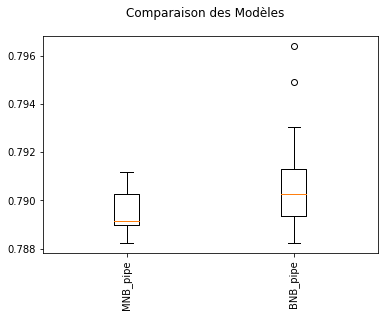

meilleur score 0.796 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 

meilleur estimateur Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(columns='text')),
                                                                 ('cleaner',
                                                                  TextNormalizer(filterByWordTags=['NN',
                                                                                                   'VB'],
                                                                                 lowercase=True,
                                                                                 removestopwords=True)),
                                                                 ('tfidf_vectorizer',
                                               

In [13]:
filename1 = 'model_TRUEvsFALSE.pkl'
X_test1, y_test1 =RunExperimentations(classificationTask=ClassificationTask.TRUEvsFalse.value,
                                    split_ratio=0.75,
                                    filename=filename1)

Accuracy : 0.821
F1 score : 0.819


              precision    recall  f1-score   support

           1    0.86757   0.74306   0.80050       432
           3    0.78817   0.89394   0.83773       462

    accuracy                        0.82103       894
   macro avg    0.82787   0.81850   0.81911       894
weighted avg    0.82654   0.82103   0.81974       894

Classification Report


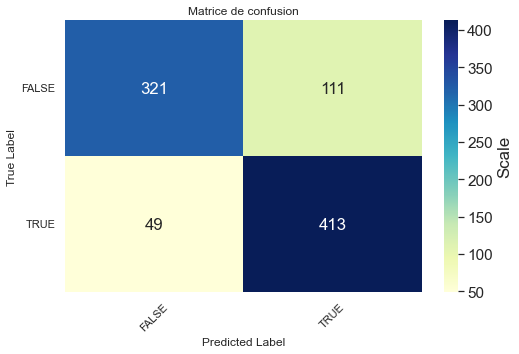

In [14]:
# Utilisation du modèle sauvegardé
best_pipeline_model_loaded1 = pickle.load(open(filename1, 'rb'))

# Prédiction
y_pred1 = best_pipeline_model_loaded1.predict(X_test1)

# Affichage scores et Matrice de confusion
MyshowAllScores(y_test1,y_pred1)

## **(TRUE or FALSE) vs MIXTURE**

FALSE      4458
MIXTURE    3928
TRUE       1614
Name: ratingName, dtype: int64


MNB_pipe : 
Time = 32.49147 s
meilleur score 0.668 

meilleurs paramètres {'mnb__alpha': 0.5, 'mnb__fit_prior': True} 



BNB_pipe : 
Time = 51.51265 s
meilleur score 0.675 

meilleurs paramètres {'bnb__alpha': 2.0, 'bnb__fit_prior': True} 

Pipeline      Score
----------  -------
BNB_pipe      0.671
MNB_pipe      0.664


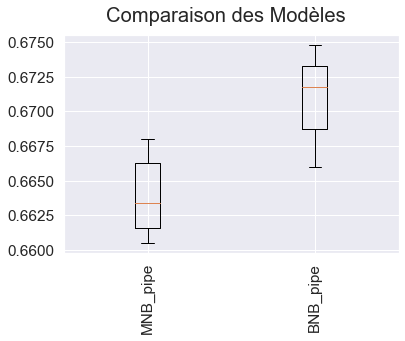

meilleur score 0.675 

meilleurs paramètres {'bnb__alpha': 2.0, 'bnb__fit_prior': True} 

meilleur estimateur Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(columns='text')),
                                                                 ('cleaner',
                                                                  TextNormalizer(filterByWordTags=['NN',
                                                                                                   'VB'],
                                                                                 lowercase=True,
                                                                                 removestopwords=True)),
                                                                 ('tfidf_vectorizer',
                                               

In [15]:
filename2 = 'model_TRUEorFALSEvsMIXTURE.pkl'
X_test2, y_test2 = RunExperimentations(classificationTask=ClassificationTask.TRUEorFALSEvsMIXTURE.value,
                                    split_ratio=0.75,
                                    filename=filename2)

Accuracy : 0.670
F1 score : 0.668


              precision    recall  f1-score   support

           2    0.66578   0.72674   0.69493       688
           4    0.67530   0.60903   0.64046       642

    accuracy                        0.66992      1330
   macro avg    0.67054   0.66789   0.66769      1330
weighted avg    0.67038   0.66992   0.66863      1330

Classification Report


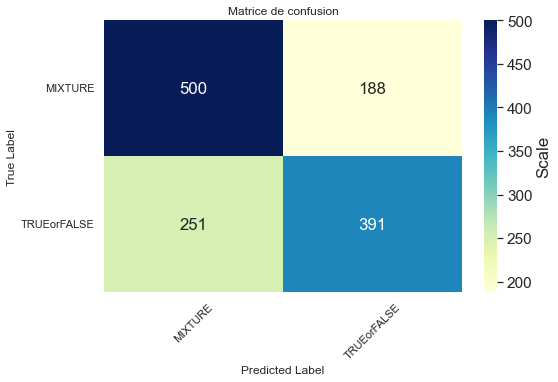

In [16]:
# Utilisation du modèle sauvegardé
best_pipeline_model_loaded2 = pickle.load(open(filename2, 'rb'))

# Prédiction
y_pred2 = best_pipeline_model_loaded2.predict(X_test2)

# Affichage scores et Matrice de confusion
MyshowAllScores(y_test2,y_pred2)

## **TRUE vs FALSE vs MIXTURE**



FALSE      4458
MIXTURE    3928
TRUE       1614
Name: ratingName, dtype: int64


MNB_pipe : 
Time = 58.80447 s
meilleur score 0.727 

meilleurs paramètres {'mnb__alpha': 0.5, 'mnb__fit_prior': True} 



BNB_pipe : 
Time = 94.41739 s
meilleur score 0.744 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 

Pipeline      Score
----------  -------
BNB_pipe      0.724
MNB_pipe      0.713


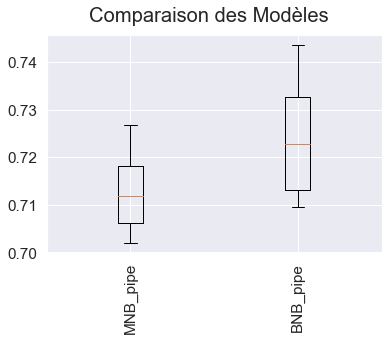

meilleur score 0.744 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 

meilleur estimateur Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(columns='text')),
                                                                 ('cleaner',
                                                                  TextNormalizer(filterByWordTags=['NN',
                                                                                                   'VB'],
                                                                                 lowercase=True,
                                                                                 removestopwords=True)),
                                                                 ('tfidf_vectorizer',
                                               

In [17]:
filename3 = 'model_TRUEvsFALSEvsMIXTURE.pkl'
X_test3, y_test3 =RunExperimentations(classificationTask=ClassificationTask.TRUEvsFalsevsMIXTURE.value,
                                    split_ratio=0.75,
                                    filename=filename3)

Accuracy : 0.792
F1 score : 0.788


              precision    recall  f1-score   support

           1    0.80637   0.80228   0.80432       789
           2    0.73729   0.66752   0.70067       782
           3    0.82190   0.89952   0.85896       826

    accuracy                        0.79182      2397
   macro avg    0.78852   0.78977   0.78798      2397
weighted avg    0.78918   0.79182   0.78933      2397

Classification Report


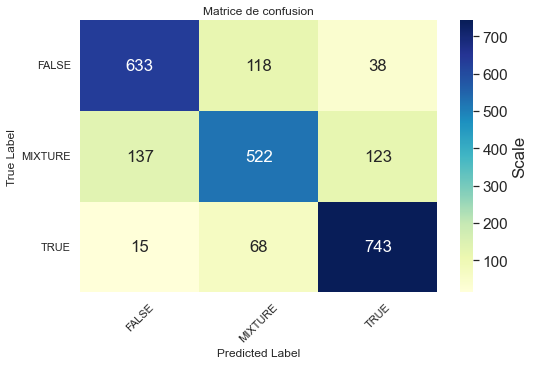

In [18]:
# Utilisation du modèle sauvegardé
best_pipeline_model_loaded3 = pickle.load(open(filename3, 'rb'))

# Prédiction
y_pred3 = best_pipeline_model_loaded3.predict(X_test3)

# Affichage scores et Matrice de confusion
MyshowAllScores(y_test3,y_pred3)

# **Analyse des différents prétraitements**

## **Tests avec classifieur MNB (sur texte)**

CV_brut : 
Time = 1.53084 s
{'memory': None, 'steps': [('cleaner', TextNormalizer()), ('count_vectorizer', CountVectorizer(lowercase=False)), ('mnb', MultinomialNB())], 'verbose': False, 'cleaner': TextNormalizer(), 'count_vectorizer': CountVectorizer(lowercase=False), 'mnb': MultinomialNB(), 'cleaner__lowercase': False, 'cleaner__getstemmer': False, 'cleaner__removestopwords': False, 'cleaner__getlemmatisation': False, 'cleaner__filterByWordTags': [], 'count_vectorizer__analyzer': 'word', 'count_vectorizer__binary': False, 'count_vectorizer__decode_error': 'strict', 'count_vectorizer__dtype': <class 'numpy.int64'>, 'count_vectorizer__encoding': 'utf-8', 'count_vectorizer__input': 'content', 'count_vectorizer__lowercase': False, 'count_vectorizer__max_df': 1.0, 'count_vectorizer__max_features': None, 'count_vectorizer__min_df': 1, 'count_vectorizer__ngram_range': (1, 1), 'count_vectorizer__preprocessor': None, 'count_vectorizer__stop_words': None, 'count_vectorizer__strip_accents': Non

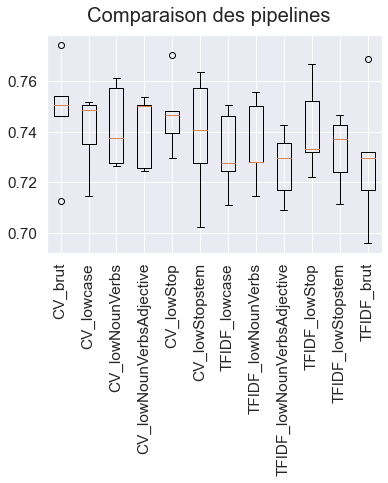

Pipeline                       Score
---------------------------  -------
CV_brut                        0.748
CV_lowStop                     0.747
CV_lowNounVerbs                0.742
TFIDF_lowStop                  0.741
CV_lowNounVerbsAdjective       0.741
CV_lowcase                     0.740
CV_lowStopstem                 0.738
TFIDF_lowNounVerbs             0.735
TFIDF_lowStopstem              0.732
TFIDF_lowcase                  0.732
TFIDF_brut                     0.729
TFIDF_lowNounVerbsAdjective    0.727


Pipeline(steps=[('cleaner', TextNormalizer()),
                ('count_vectorizer', CountVectorizer(lowercase=False)),
                ('mnb', MultinomialNB())])

In [20]:
# Charger les Données (attention le séparateur est une tabulation)
df=pd.read_csv('claimskg_result_true_false_mixture_full.csv', sep=',')

####################################################################################################
#                                Prétraitement / Ingénierie des données                            #
####################################################################################################
# Retirer Auteurs inconnus
df = df.drop(df[df.author == "Unknown"].index)

# Retirer OTHER
df = df.drop(df[df.truthRating == Rating.OTHER.value].index)

# Retirer MIXTURE
df = df.drop(df[df.truthRating == Rating.MIXTURE.value].index)
# Upsampling de la classe minoritaire (true_class)
false_class = df[df["truthRating"] == 1]
true_class  = df[df["truthRating"] == 3]
true_class = resample(true_class,
     replace=True,
     n_samples=len(false_class),
     random_state=42)
df = pd.concat([false_class, true_class])


# Shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

#------------------------------------------------------------------------
# Récupération des 7 colonnes (texte, auteurs, date, keywords, headline, named_entities_claim, named_entities_article)
# X matrice représentant les variables prédictives 
X = df['text']
# y vecteur : représentant la variable à prédire
y = df['truthRating']

# Split des données
testsize= 1-0.75
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=0.75, 
                                               random_state=42,
                                               test_size=testsize)
# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

CV_lowNoun = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN'])), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
CV_lowNounVerbs = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB'])), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
CV_lowNounVerbsAdjective = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB', 'JJ'])), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
TFIDF_lowNounVerbs = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB'])), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
TFIDF_lowNounVerbsAdjective = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB', 'JJ'])), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ("mnb", MultinomialNB())])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowNounVerbs", CV_lowNounVerbs),
    ("CV_lowNounVerbsAdjective", CV_lowNounVerbsAdjective),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowNounVerbs", TFIDF_lowNounVerbs),
    ("TFIDF_lowNounVerbsAdjective", TFIDF_lowNounVerbsAdjective),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]
pipeline_evaluation_cross_val(all_models)

## **Tests avec classifieur MNB (sur headline)**

CV_brut : 
Time = 1.22331 s
{'memory': None, 'steps': [('cleaner', TextNormalizer()), ('count_vectorizer', CountVectorizer(lowercase=False)), ('mnb', MultinomialNB())], 'verbose': False, 'cleaner': TextNormalizer(), 'count_vectorizer': CountVectorizer(lowercase=False), 'mnb': MultinomialNB(), 'cleaner__lowercase': False, 'cleaner__getstemmer': False, 'cleaner__removestopwords': False, 'cleaner__getlemmatisation': False, 'cleaner__filterByWordTags': [], 'count_vectorizer__analyzer': 'word', 'count_vectorizer__binary': False, 'count_vectorizer__decode_error': 'strict', 'count_vectorizer__dtype': <class 'numpy.int64'>, 'count_vectorizer__encoding': 'utf-8', 'count_vectorizer__input': 'content', 'count_vectorizer__lowercase': False, 'count_vectorizer__max_df': 1.0, 'count_vectorizer__max_features': None, 'count_vectorizer__min_df': 1, 'count_vectorizer__ngram_range': (1, 1), 'count_vectorizer__preprocessor': None, 'count_vectorizer__stop_words': None, 'count_vectorizer__strip_accents': Non

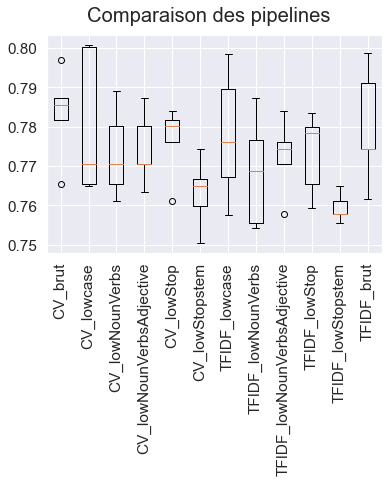

Pipeline                       Score
---------------------------  -------
CV_brut                        0.783
CV_lowcase                     0.780
TFIDF_brut                     0.780
TFIDF_lowcase                  0.778
CV_lowStop                     0.777
CV_lowNounVerbsAdjective       0.774
TFIDF_lowStop                  0.773
CV_lowNounVerbs                0.773
TFIDF_lowNounVerbsAdjective    0.773
TFIDF_lowNounVerbs             0.768
CV_lowStopstem                 0.763
TFIDF_lowStopstem              0.760


Pipeline(steps=[('cleaner', TextNormalizer()),
                ('count_vectorizer', CountVectorizer(lowercase=False)),
                ('mnb', MultinomialNB())])

In [21]:
# Charger les Données (attention le séparateur est une tabulation)
df=pd.read_csv('claimskg_result_true_false_mixture_full.csv', sep=',')

####################################################################################################
#                                Prétraitement / Ingénierie des données                            #
####################################################################################################
# Retirer Auteurs inconnus
df = df.drop(df[df.author == "Unknown"].index)

# Retirer OTHER
df = df.drop(df[df.truthRating == Rating.OTHER.value].index)

# Retirer MIXTURE
df = df.drop(df[df.truthRating == Rating.MIXTURE.value].index)
# Upsampling de la classe minoritaire (true_class)
false_class = df[df["truthRating"] == 1]
true_class  = df[df["truthRating"] == 3]
true_class = resample(true_class,
     replace=True,
     n_samples=len(false_class),
     random_state=42)
df = pd.concat([false_class, true_class])


# Shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

#------------------------------------------------------------------------
# Récupération des 7 colonnes (texte, auteurs, date, keywords, headline, named_entities_claim, named_entities_article)
# X matrice représentant les variables prédictives 
X = df['headline']
# y vecteur : représentant la variable à prédire
y = df['truthRating']

# Split des données
testsize= 1-0.75
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=0.75, 
                                               random_state=42,
                                               test_size=testsize)
# le plus simple est de faire un test sur differents pipelines.  
# pipeline de l'utilisation de CountVectorizer sur le texte avec differents pre-traitements
CV_brut = Pipeline([('cleaner', TextNormalizer()), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
CV_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

CV_lowNoun = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN'])), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
CV_lowNounVerbs = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB'])), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
CV_lowNounVerbsAdjective = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB', 'JJ'])), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

CV_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

CV_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

# pipeline de l'utilisation de TfidfVectorizer avec differents pre-traitements
TFIDF_brut = Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

TFIDF_lowcase = Pipeline([('cleaner', TextNormalizer(removestopwords=False,lowercase=True,
                                               getstemmer=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
TFIDF_lowNounVerbs = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB'])), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])
TFIDF_lowNounVerbsAdjective = Pipeline([('cleaner', TextNormalizer(lowercase=True, filterByWordTags=['NN', 'VB', 'JJ'])), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

TFIDF_lowStop = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ('mnb', MultinomialNB())])

TFIDF_lowStopstem = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ("mnb", MultinomialNB())])


# Liste de tous les modeles à tester
all_models = [
    ("CV_brut", CV_brut),
    ("CV_lowcase", CV_lowcase),
    ("CV_lowNounVerbs", CV_lowNounVerbs),
    ("CV_lowNounVerbsAdjective", CV_lowNounVerbsAdjective),
    ("CV_lowStop", CV_lowStop),
    ("CV_lowStopstem",CV_lowStopstem),
    
    ("TFIDF_lowcase", TFIDF_lowcase),
    ("TFIDF_lowNounVerbs", TFIDF_lowNounVerbs),
    ("TFIDF_lowNounVerbsAdjective", TFIDF_lowNounVerbsAdjective),
    ("TFIDF_lowStop", TFIDF_lowStop),
    ("TFIDF_lowStopstem",TFIDF_lowStopstem),
    ("TFIDF_brut", TFIDF_brut)
]
pipeline_evaluation_cross_val(all_models)

## **Test classement des classifieurs**

### RunExperimentations1

In [27]:
def RunExperimentations1(classificationTask=1 ,split_ratio=0.7, filename='model.pkl'):
    # Charger les Données (attention le séparateur est une tabulation)
    df=pd.read_csv('claimskg_result_true_false_mixture_full.csv', sep=',')
    
    ####################################################################################################
    #                                Prétraitement / Ingénierie des données                            #
    ####################################################################################################
    print(df["ratingName"].value_counts())
    # Retirer Auteurs inconnus
    df = df.drop(df[df.author == "Unknown"].index)
    
    # Retirer OTHER
    df = df.drop(df[df.truthRating == Rating.OTHER.value].index)
    
    
    #------------------------------------------------------------------------
    if classificationTask == ClassificationTask.TRUEvsFalse.value :
        # Retirer MIXTURE
        df = df.drop(df[df.truthRating == Rating.MIXTURE.value].index)
        # Upsampling de la classe minoritaire (true_class)
        false_class = df[df["truthRating"] == 1]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(false_class),
             random_state=42)
        df = pd.concat([false_class, true_class])
        
    if classificationTask == ClassificationTask.TRUEorFALSEvsMIXTURE.value :
        # Remplacer TRUE or FALSE
        df.loc[df.truthRating == 1, 'truthRating'] = 4
        df.loc[df.truthRating == 3, 'truthRating'] = 4
        df.loc[df.ratingName == "FALSE", 'ratingName'] = "TRUEorFALSE"
        df.loc[df.ratingName == "TRUE", 'ratingName'] = "TRUEorFALSE"
        
        # Upsampling de la classe minoritaire (mixture_class)
        true_or_false_class = df[df["truthRating"] == 4]
        mixture_class = df[df["truthRating"] == 2]
        mixture_class = resample(mixture_class,
             replace=True,
             n_samples=len(true_or_false_class),
             random_state=42)
        df = pd.concat([true_or_false_class, mixture_class])
        
    if classificationTask == ClassificationTask.TRUEvsFalsevsMIXTURE.value :
        # Upsampling des classes minoritaires (true_class et mixture_class)
        false_class = df[df["truthRating"] == 1]
        mixture_class = df[df["truthRating"] == 2]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(mixture_class),
             random_state=42)
        false_class = resample(false_class,
                 replace=True,
                 n_samples=len(mixture_class),
                 random_state=42)
        df = pd.concat([false_class, mixture_class ,true_class])
    
    
    # Shuffle dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    
    # print(df["ratingName"].value_counts())
    # df.groupby('ratingName').size().plot(kind='pie',
    #                                    y = "ratingName",
    #                                    label = "",
    #                                    autopct='%1.1f%%')
    # plt.show()

    #------------------------------------------------------------------------
    # Récupération des 7 colonnes (texte, auteurs, date, keywords, headline, named_entities_claim, named_entities_article)
    # X matrice représentant les variables prédictives 
    X = df[['author', 'text', 'date', 'keywords', 'headline','named_entities_claim', 'named_entities_article']]
    # y vecteur : représentant la variable à prédire
    y = df['truthRating']
    
    # Split des données
    testsize= 1-split_ratio
    X_train,X_test,y_train,y_test=train_test_split(X, 
                                                   y, 
                                                   train_size=split_ratio, 
                                                   random_state=42,
                                                   test_size=testsize)
    
    ####################################################################################################
    #                                          Classification                                          #
    ####################################################################################################
    # Define Text pipeline
    text_Count_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    text_Tfidf_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define author pipeline
    author_Count_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    author_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define date pipeline
    date_Count_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    date_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define keywords pipeline
    keywords_Count_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    keywords_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define headline pipeline
    headline_Count_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    headline_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Fit column transformer to training data
    preprocessor = FeatureUnion(
        transformer_list=[
        ('text', text_Count_pipe),
        ('author', author_Count_pipe),
        ('date', date_Count_pipe),
        ('keywords', keywords_Count_pipe),
        ('headline', headline_Count_pipe),
    ],
      # weight components in FeatureUnion
      transformer_weights={
          'text': 1.0,
          'author': 1.0,
          'date': 0.2,
          'keywords': 0.2,
          'headline': 0.2
      },
    )
    
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    SVC_pipe = Pipeline([('preprocessor', preprocessor),
                        ('svm', SVC())])
    grid_param_SVC = {
        'svm__kernel': ['linear','rbf'],
        'svm__C': [0.001, 0.01, 0.1, 1, 10], 
        'svm__gamma' : [0.001, 0.01, 0.1, 1], 
        'svm__kernel': ['linear','rbf'],
        }
    ###############################################################################################
    LR_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('lr', LogisticRegression())])
    grid_param_LR = {
        'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'lr__penalty' : ['l2'],
        'lr__C' : [100, 10, 1.0, 0.1, 0.01],
        }
    ###############################################################################################
    MNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('mnb', MultinomialNB())])
    grid_param_MNB = {
        'mnb__alpha': np.linspace(0.5, 1.5, 6),
        'mnb__fit_prior': [True, False],
    }
    ###############################################################################################
    BNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('bnb', BernoulliNB())])
    grid_param_BNB = {
        'bnb__alpha': np.linspace(0.5, 2.0, 10),
        'bnb__fit_prior': [True, False],  
    }

    ###############################################################################################
    CoNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('conb', ComplementNB())])
    grid_param_CoNB = {
        'conb__alpha': np.linspace(0.5, 2.0, 10),
        'conb__fit_prior': [True, False],  
    }
    ###############################################################################################
    GNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('to_dense', DenseTransformer()), 
                        ('gnb', GaussianNB())])
    grid_param_GNB = {}
    ###############################################################################################
    RFC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('rfc', RandomForestClassifier())])
    grid_param_RFC = {
        'rfc__n_estimators': [500, 1200],
        'rfc__max_depth': [25, 30],
        'rfc__min_samples_split': [5, 10, 15],
        'rfc__min_samples_leaf' : [1, 2], 
    }
    ###############################################################################################
    DTC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('dtc', DecisionTreeClassifier())])
    grid_param_DTC = {  
        'dtc__max_depth': [1,2,3],
        'dtc__criterion': ['gini', 'entropy'],
        'dtc__min_samples_leaf': [1,2,3]
    }
    ###############################################################################################
    KNN_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('knn', KNeighborsClassifier())])
    grid_param_KNN = {  
        'knn__n_neighbors': list(range(1,15)),
        'knn__metric': ['minkowski','euclidean','manhattan']
    }
    ###############################################################################################
    # Liste de tous les modeles à tester
    all_models = [
        ("MNB_pipe", MNB_pipe, grid_param_MNB),
        ("BNB_pipe", BNB_pipe, grid_param_BNB),
        ("CoNB_pipe", CoNB_pipe, grid_param_CoNB),
        ("GNB_pipe", GNB_pipe, grid_param_GNB),

        ("LR_pipe", LR_pipe, grid_param_LR),
        ("RFC_pipe", RFC_pipe, grid_param_RFC),

        ("SVC_pipe", SVC_pipe, grid_param_SVC),
        ("KNN_pipe", KNN_pipe, grid_param_KNN),
        ("DTC_pipe", DTC_pipe, grid_param_DTC),
    ]
    
    ####################################################################################################
    #                    Evaluation du meilleur modèle et affichage des résultats                      #
    ####################################################################################################
    # Evaluation du meilleur modèle par Cross Validation (GridSearchCV)
    best_pipeline_model, results, names= pipeline_evaluation_GridSearchCV(all_models, X_train, y_train)
    
    # Affichage boîte à moustache
    fig = plt.figure()
    fig.suptitle('Comparaison des Classifieurs')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    plt.xticks(rotation = 90)
    ax.set_xticklabels(names)
    plt.show()
    
    print ('meilleur score %0.3f'%(best_pipeline_model.best_score_),'\n')
    print ('meilleurs paramètres', best_pipeline_model.best_params_,'\n')
    print ('meilleur estimateur',best_pipeline_model.best_estimator_,'\n')
    
    
    # Apprentissage du meilleur modèle
    best_pipeline_model.fit(X_train, y_train)
    
    # Sauvegarde du modèle appris
    pickle.dump(best_pipeline_model, open(filename, 'wb'))
    
    return X_test, y_test

FALSE      4458
MIXTURE    3928
TRUE       1614
Name: ratingName, dtype: int64


MNB_pipe : 
Time = 22.03282 s
meilleur score 0.773 

meilleurs paramètres {'mnb__alpha': 0.5, 'mnb__fit_prior': True} 



BNB_pipe : 
Time = 33.99467 s
meilleur score 0.797 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 



CoNB_pipe : 
Time = 36.21428 s
meilleur score 0.771 

meilleurs paramètres {'conb__alpha': 0.5, 'conb__fit_prior': True} 



GNB_pipe : 
Time = 5.92067 s
meilleur score 0.762 

meilleurs paramètres {} 



LR_pipe : 
Time = 27.32993 s
meilleur score 0.799 

meilleurs paramètres {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'} 



RFC_pipe : 
Time = 59.59440 s
meilleur score 0.783 

meilleurs paramètres {'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 1200} 



SVC_pipe : 
Time = 82.07431 s
meilleur score 0.826 

meilleurs paramètres {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'} 



KNN_pipe : 
Tim

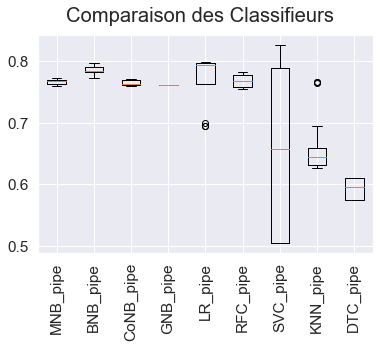

meilleur score 0.797 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 

meilleur estimateur Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(columns='text')),
                                                                 ('cleaner',
                                                                  TextNormalizer(filterByWordTags=['NN',
                                                                                                   'VB'],
                                                                                 lowercase=True,
                                                                                 removestopwords=True)),
                                                                 ('count_vectorizer',
                                               

In [28]:
filename4 = 'model_TRUEvsFALSE.pkl'
X_test4, y_test4 =RunExperimentations1(classificationTask=ClassificationTask.TRUEvsFalse.value,
                                    split_ratio=0.75,
                                    filename=filename4)

### RunExperimentations2

In [29]:
def RunExperimentations2(classificationTask=1 ,split_ratio=0.7, filename='model.pkl'):
    # Charger les Données (attention le séparateur est une tabulation)
    df=pd.read_csv('claimskg_result_true_false_mixture_full.csv', sep=',')
    
    ####################################################################################################
    #                                Prétraitement / Ingénierie des données                            #
    ####################################################################################################
    print(df["ratingName"].value_counts())
    # Retirer Auteurs inconnus
    df = df.drop(df[df.author == "Unknown"].index)
    
    # Retirer OTHER
    df = df.drop(df[df.truthRating == Rating.OTHER.value].index)
    
    
    #------------------------------------------------------------------------
    if classificationTask == ClassificationTask.TRUEvsFalse.value :
        # Retirer MIXTURE
        df = df.drop(df[df.truthRating == Rating.MIXTURE.value].index)
        # Upsampling de la classe minoritaire (true_class)
        false_class = df[df["truthRating"] == 1]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(false_class),
             random_state=42)
        df = pd.concat([false_class, true_class])
        
    if classificationTask == ClassificationTask.TRUEorFALSEvsMIXTURE.value :
        # Remplacer TRUE or FALSE
        df.loc[df.truthRating == 1, 'truthRating'] = 4
        df.loc[df.truthRating == 3, 'truthRating'] = 4
        df.loc[df.ratingName == "FALSE", 'ratingName'] = "TRUEorFALSE"
        df.loc[df.ratingName == "TRUE", 'ratingName'] = "TRUEorFALSE"
        
        # Upsampling de la classe minoritaire (mixture_class)
        true_or_false_class = df[df["truthRating"] == 4]
        mixture_class = df[df["truthRating"] == 2]
        mixture_class = resample(mixture_class,
             replace=True,
             n_samples=len(true_or_false_class),
             random_state=42)
        df = pd.concat([true_or_false_class, mixture_class])
        
    if classificationTask == ClassificationTask.TRUEvsFalsevsMIXTURE.value :
        # Upsampling des classes minoritaires (true_class et mixture_class)
        false_class = df[df["truthRating"] == 1]
        mixture_class = df[df["truthRating"] == 2]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(mixture_class),
             random_state=42)
        false_class = resample(false_class,
                 replace=True,
                 n_samples=len(mixture_class),
                 random_state=42)
        df = pd.concat([false_class, mixture_class ,true_class])
    
    
    # Shuffle dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    
    # print(df["ratingName"].value_counts())
    # df.groupby('ratingName').size().plot(kind='pie',
    #                                    y = "ratingName",
    #                                    label = "",
    #                                    autopct='%1.1f%%')
    # plt.show()

    #------------------------------------------------------------------------
    # Récupération des 7 colonnes (texte, auteurs, date, keywords, headline, named_entities_claim, named_entities_article)
    # X matrice représentant les variables prédictives 
    X = df[['author', 'text', 'date', 'keywords', 'headline','named_entities_claim', 'named_entities_article']]
    # y vecteur : représentant la variable à prédire
    y = df['truthRating']
    
    # Split des données
    testsize= 1-split_ratio
    X_train,X_test,y_train,y_test=train_test_split(X, 
                                                   y, 
                                                   train_size=split_ratio, 
                                                   random_state=42,
                                                   test_size=testsize)
    
    ####################################################################################################
    #                                          Classification                                          #
    ####################################################################################################
    # Define Text pipeline
    text_Count_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    text_Tfidf_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define author pipeline
    author_Count_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    author_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define date pipeline
    date_Count_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    date_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define keywords pipeline
    keywords_Count_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    keywords_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define headline pipeline
    headline_Count_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    headline_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Fit column transformer to training data
    preprocessor = FeatureUnion(
        transformer_list=[
        ('text', text_Tfidf_pipe),
        ('author', author_Tfidf_pipe),
        ('date', date_Tfidf_pipe),
        ('keywords', keywords_Tfidf_pipe),
        ('headline', headline_Tfidf_pipe),
    ],
      # weight components in FeatureUnion
      transformer_weights={
          'text': 0.5,
          'author': 0.5,
          'date': 1.0,
          'keywords': 0.5,
          'headline': 0.5
      },
    )
    
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    SVC_pipe = Pipeline([('preprocessor', preprocessor),
                        ('svm', SVC())])
    grid_param_SVC = {
        'svm__kernel': ['linear','rbf'],
        'svm__C': [0.001, 0.01, 0.1, 1, 10], 
        'svm__gamma' : [0.001, 0.01, 0.1, 1], 
        'svm__kernel': ['linear','rbf'],
        }
    ###############################################################################################
    LR_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('lr', LogisticRegression())])
    grid_param_LR = {
        'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'lr__penalty' : ['l2'],
        'lr__C' : [100, 10, 1.0, 0.1, 0.01],
        }
    ###############################################################################################
    MNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('mnb', MultinomialNB())])
    grid_param_MNB = {
        'mnb__alpha': np.linspace(0.5, 1.5, 6),
        'mnb__fit_prior': [True, False],
    }
    ###############################################################################################
    BNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('bnb', BernoulliNB())])
    grid_param_BNB = {
        'bnb__alpha': np.linspace(0.5, 2.0, 10),
        'bnb__fit_prior': [True, False],  
    }

    ###############################################################################################
    CoNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('conb', ComplementNB())])
    grid_param_CoNB = {
        'conb__alpha': np.linspace(0.5, 2.0, 10),
        'conb__fit_prior': [True, False],  
    }
    ###############################################################################################
    GNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('to_dense', DenseTransformer()), 
                        ('gnb', GaussianNB())])
    grid_param_GNB = {}
    ###############################################################################################
    RFC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('rfc', RandomForestClassifier())])
    grid_param_RFC = {
        'rfc__n_estimators': [500, 1200],
        'rfc__max_depth': [25, 30],
        'rfc__min_samples_split': [5, 10, 15],
        'rfc__min_samples_leaf' : [1, 2], 
    }
    ###############################################################################################
    DTC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('dtc', DecisionTreeClassifier())])
    grid_param_DTC = {  
        'dtc__max_depth': [1,2,3],
        'dtc__criterion': ['gini', 'entropy'],
        'dtc__min_samples_leaf': [1,2,3]
    }
    ###############################################################################################
    KNN_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('knn', KNeighborsClassifier())])
    grid_param_KNN = {  
        'knn__n_neighbors': list(range(1,15)),
        'knn__metric': ['minkowski','euclidean','manhattan']
    }
    ###############################################################################################
    # Liste de tous les modeles à tester
    all_models = [
        ("MNB_pipe", MNB_pipe, grid_param_MNB),
        ("BNB_pipe", BNB_pipe, grid_param_BNB),
        ("CoNB_pipe", CoNB_pipe, grid_param_CoNB),
        ("GNB_pipe", GNB_pipe, grid_param_GNB),

        ("LR_pipe", LR_pipe, grid_param_LR),
        ("RFC_pipe", RFC_pipe, grid_param_RFC),

        ("SVC_pipe", SVC_pipe, grid_param_SVC),
        ("KNN_pipe", KNN_pipe, grid_param_KNN),
        ("DTC_pipe", DTC_pipe, grid_param_DTC),
    ]
    
    ####################################################################################################
    #                    Evaluation du meilleur modèle et affichage des résultats                      #
    ####################################################################################################
    # Evaluation du meilleur modèle par Cross Validation (GridSearchCV)
    best_pipeline_model, results, names= pipeline_evaluation_GridSearchCV(all_models, X_train, y_train)
    
    # Affichage boîte à moustache
    fig = plt.figure()
    fig.suptitle('Comparaison des Classifieurs')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    plt.xticks(rotation = 90)
    ax.set_xticklabels(names)
    plt.show()
    
    print ('meilleur score %0.3f'%(best_pipeline_model.best_score_),'\n')
    print ('meilleurs paramètres', best_pipeline_model.best_params_,'\n')
    print ('meilleur estimateur',best_pipeline_model.best_estimator_,'\n')
    
    
    # Apprentissage du meilleur modèle
    best_pipeline_model.fit(X_train, y_train)
    
    # Sauvegarde du modèle appris
    pickle.dump(best_pipeline_model, open(filename, 'wb'))
    
    return X_test, y_test

FALSE      4458
MIXTURE    3928
TRUE       1614
Name: ratingName, dtype: int64


MNB_pipe : 
Time = 21.16784 s
meilleur score 0.763 

meilleurs paramètres {'mnb__alpha': 0.9, 'mnb__fit_prior': True} 



BNB_pipe : 
Time = 33.72459 s
meilleur score 0.792 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': False} 



CoNB_pipe : 
Time = 35.69649 s
meilleur score 0.762 

meilleurs paramètres {'conb__alpha': 0.8333333333333333, 'conb__fit_prior': True} 



GNB_pipe : 
Time = 5.80401 s
meilleur score 0.746 

meilleurs paramètres {} 



LR_pipe : 
Time = 26.85257 s
meilleur score 0.793 

meilleurs paramètres {'lr__C': 100, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'} 



RFC_pipe : 
Time = 59.83251 s
meilleur score 0.772 

meilleurs paramètres {'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 1200} 



SVC_pipe : 
Time = 80.58775 s
meilleur score 0.821 

meilleurs paramètres {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'} 



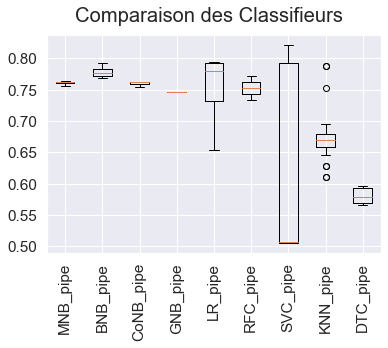

meilleur score 0.792 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': False} 

meilleur estimateur Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(columns='text')),
                                                                 ('cleaner',
                                                                  TextNormalizer(filterByWordTags=['NN',
                                                                                                   'VB'],
                                                                                 lowercase=True,
                                                                                 removestopwords=True)),
                                                                 ('tfidf_vectorizer',
                                              

In [30]:
filename5 = 'model_TRUEvsFALSE.pkl'
X_test5, y_test5 =RunExperimentations2(classificationTask=ClassificationTask.TRUEvsFalse.value,
                                    split_ratio=0.75,
                                    filename=filename5)

## **Tests rééquilibrage de la base de donnée**

### Hard downsampling

In [31]:
def RunExperimentations6(classificationTask=1 ,split_ratio=0.7, filename='model.pkl'):
    # Charger les Données (attention le séparateur est une tabulation)
    df=pd.read_csv('claimskg_result_true_false_mixture_full.csv', sep=',')
    
    ####################################################################################################
    #                                Prétraitement / Ingénierie des données                            #
    ####################################################################################################
    print(df["ratingName"].value_counts())
    # Retirer Auteurs inconnus
    # df = df.drop(df[df.author == "Unknown"].index)
    
    # Retirer MIXTURE
    df = df.drop(df[df.truthRating == Rating.MIXTURE.value].index)
    
    print(df["ratingName"].value_counts())
    df.groupby('ratingName').size().plot(kind='pie',
                                       y = "ratingName",
                                       label = "",
                                       autopct='%1.1f%%')
    plt.show()

    # Retirer OTHER
    df = df.drop(df[df.truthRating == Rating.OTHER.value].index)
    
    g = df.groupby('truthRating')
    df =pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True))
    df = df.sample(frac=1).reset_index(drop=True)
    
    # Shuffle dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    
    print(df["ratingName"].value_counts())
    df.groupby('ratingName').size().plot(kind='pie',
                                       y = "ratingName",
                                       label = "",
                                       autopct='%1.1f%%')
    plt.show()

    #------------------------------------------------------------------------
    # Récupération des 7 colonnes (texte, auteurs, date, keywords, headline, named_entities_claim, named_entities_article)
    # X matrice représentant les variables prédictives 
    X = df[['author', 'text', 'date', 'keywords', 'headline','named_entities_claim', 'named_entities_article']]
    # y vecteur : représentant la variable à prédire
    y = df['truthRating']
    
    # Split des données
    testsize= 1-split_ratio
    X_train,X_test,y_train,y_test=train_test_split(X, 
                                                   y, 
                                                   train_size=split_ratio, 
                                                   random_state=42,
                                                   test_size=testsize)
    
    ####################################################################################################
    #                                          Classification                                          #
    ####################################################################################################
    # Define Text pipeline
    text_Count_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    text_Tfidf_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define author pipeline
    author_Count_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    author_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define date pipeline
    date_Count_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    date_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define keywords pipeline
    keywords_Count_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    keywords_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define headline pipeline
    headline_Count_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    headline_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Fit column transformer to training data
    preprocessor = FeatureUnion(
        transformer_list=[
        ('text', text_Tfidf_pipe),
        ('author', author_Tfidf_pipe),
        ('date', date_Count_pipe),
        ('keywords', keywords_Tfidf_pipe),
        ('headline', headline_Count_pipe),
    ],
      # weight components in FeatureUnion
      transformer_weights={
          'text': 1.0,
          'author': 1.0,
          'date': 0.3,
          'keywords': 0.0,
          'headline': 1.0
      },
    )
    
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    SVC_pipe = Pipeline([('preprocessor', preprocessor),
                        ('svm', SVC())])
    grid_param_SVC = {
        'svm__kernel': ['linear','rbf'],
        'svm__C': [0.001, 0.01, 0.1, 1, 10], 
        'svm__gamma' : [0.001, 0.01, 0.1, 1], 
        'svm__kernel': ['linear','rbf'],
        }
    ###############################################################################################
    LR_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('lr', LogisticRegression())])
    grid_param_LR = {
        'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'lr__penalty' : ['l2'],
        'lr__C' : [100, 10, 1.0, 0.1, 0.01],
        }
    ###############################################################################################
    MNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('mnb', MultinomialNB())])
    grid_param_MNB = {
        'mnb__alpha': np.linspace(0.5, 1.5, 6),
        'mnb__fit_prior': [True, False],
    }
    ###############################################################################################
    BNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('bnb', BernoulliNB())])
    grid_param_BNB = {
        'bnb__alpha': np.linspace(0.5, 2.0, 10),
        'bnb__fit_prior': [True, False],  
    }

    ###############################################################################################
    CoNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('conb', ComplementNB())])
    grid_param_CoNB = {
        'conb__alpha': np.linspace(0.5, 2.0, 10),
        'conb__fit_prior': [True, False],  
    }
    ###############################################################################################
    GNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('to_dense', DenseTransformer()), 
                        ('gnb', GaussianNB())])
    grid_param_GNB = {}
    ###############################################################################################
    RFC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('rfc', RandomForestClassifier())])
    grid_param_RFC = {
        'rfc__n_estimators': [500, 1200],
        'rfc__max_depth': [25, 30],
        'rfc__min_samples_split': [5, 10, 15],
        'rfc__min_samples_leaf' : [1, 2], 
    }
    ###############################################################################################
    DTC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('dtc', DecisionTreeClassifier())])
    grid_param_DTC = {  
        'dtc__max_depth': [1,2,3,4,5,6,7,8,9,10],
        'dtc__criterion': ['gini', 'entropy'],
        'dtc__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    }
    ###############################################################################################
    KNN_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('knn', KNeighborsClassifier())])
    grid_param_KNN = {  
        'knn__n_neighbors': list(range(1,15)),
        'knn__metric': ['minkowski','euclidean','manhattan']
    }
    ###############################################################################################
    # Liste de tous les modeles à tester
    all_models = [
        ("MNB_pipe", MNB_pipe, grid_param_MNB),
        ("BNB_pipe", BNB_pipe, grid_param_BNB),
#         ("CoNB_pipe", CoNB_pipe, grid_param_CoNB),
#         ("GNB_pipe", GNB_pipe, grid_param_GNB),

#         ("LR_pipe", LR_pipe, grid_param_LR),
        ("RFC_pipe", RFC_pipe, grid_param_RFC),

#         ("SVC_pipe", SVC_pipe, grid_param_SVC),
#         ("KNN_pipe", KNN_pipe, grid_param_KNN),
#         ("DTC_pipe", DTC_pipe, grid_param_DTC),
    ]
    
    ####################################################################################################
    #                    Evaluation du meilleur modèle et affichage des résultats                      #
    ####################################################################################################
    # Evaluation du meilleur modèle par Cross Validation (GridSearchCV)
    best_pipeline_model, results, names= pipeline_evaluation_GridSearchCV(all_models, X_train, y_train)
    
    # Affichage boîte à moustache
    fig = plt.figure()
    fig.suptitle('Comparaison des Modèles')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    plt.xticks(rotation = 90)
    ax.set_xticklabels(names)
    plt.show()
    
    print ('meilleur score %0.3f'%(best_pipeline_model.best_score_),'\n')
    print ('meilleurs paramètres', best_pipeline_model.best_params_,'\n')
    print ('meilleur estimateur',best_pipeline_model.best_estimator_,'\n')
    
    
    # Apprentissage du meilleur modèle
    best_pipeline_model.fit(X_train, y_train)
    
    # Sauvegarde du modèle appris
    pickle.dump(best_pipeline_model, open(filename, 'wb'))
    
    return X_test, y_test

FALSE      4458
MIXTURE    3928
TRUE       1614
Name: ratingName, dtype: int64
FALSE    4458
TRUE     1614
Name: ratingName, dtype: int64


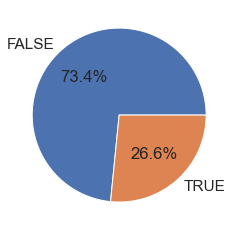

FALSE    1614
TRUE     1614
Name: ratingName, dtype: int64


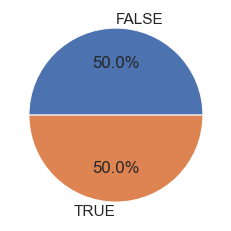



MNB_pipe : 
Time = 19.38768 s
meilleur score 0.637 

meilleurs paramètres {'mnb__alpha': 1.1, 'mnb__fit_prior': True} 



BNB_pipe : 
Time = 29.85953 s
meilleur score 0.643 

meilleurs paramètres {'bnb__alpha': 1.3333333333333333, 'bnb__fit_prior': True} 



RFC_pipe : 
Time = 51.87337 s
meilleur score 0.639 

meilleurs paramètres {'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 500} 

Pipeline      Score
----------  -------
BNB_pipe      0.640
MNB_pipe      0.635
RFC_pipe      0.633


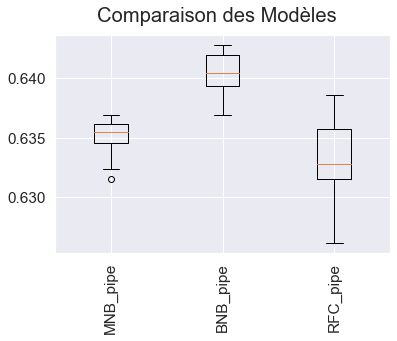

meilleur score 0.643 

meilleurs paramètres {'bnb__alpha': 1.3333333333333333, 'bnb__fit_prior': True} 

meilleur estimateur Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(columns='text')),
                                                                 ('cleaner',
                                                                  TextNormalizer(filterByWordTags=['NN',
                                                                                                   'VB'],
                                                                                 lowercase=True,
                                                                                 removestopwords=True)),
                                                                 ('tfidf_vectorizer',
                                

In [32]:
filename6 = 'model_TRUEvsFALSE.pkl'
X_test6, y_test6 =RunExperimentations6(classificationTask=ClassificationTask.TRUEvsFalse.value,
                                    split_ratio=0.75,
                                    filename=filename6)

### Upsampling grâce à la fonction resample de Scikit Learn

In [33]:
def RunExperimentations7(classificationTask=1 ,split_ratio=0.7, filename='model.pkl'):
    # Charger les Données (attention le séparateur est une tabulation)
    df=pd.read_csv('claimskg_result_true_false_mixture_full.csv', sep=',')
    
    ####################################################################################################
    #                                Prétraitement / Ingénierie des données                            #
    ####################################################################################################
    print(df["ratingName"].value_counts())
    # Retirer Auteurs inconnus
    # df = df.drop(df[df.author == "Unknown"].index)
    
    # Retirer OTHER
    df = df.drop(df[df.truthRating == Rating.OTHER.value].index)
    
    
    #------------------------------------------------------------------------
    if classificationTask == ClassificationTask.TRUEvsFalse.value :
        # Retirer MIXTURE
        df = df.drop(df[df.truthRating == Rating.MIXTURE.value].index)
        
        print(df["ratingName"].value_counts())
        df.groupby('ratingName').size().plot(kind='pie',
                                           y = "ratingName",
                                           label = "",
                                           autopct='%1.1f%%')
        plt.show()
        # Upsampling de la classe minoritaire (true_class)
        false_class = df[df["truthRating"] == 1]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(false_class),
             random_state=42)
        df = pd.concat([false_class, true_class])
        
    if classificationTask == ClassificationTask.TRUEorFALSEvsMIXTURE.value :
        # Remplacer TRUE or FALSE
        df.loc[df.truthRating == 1, 'truthRating'] = 4
        df.loc[df.truthRating == 3, 'truthRating'] = 4
        df.loc[df.ratingName == "FALSE", 'ratingName'] = "TRUEorFALSE"
        df.loc[df.ratingName == "TRUE", 'ratingName'] = "TRUEorFALSE"
        
        # Upsampling de la classe minoritaire (mixture_class)
        true_or_false_class = df[df["truthRating"] == 4]
        mixture_class = df[df["truthRating"] == 2]
        mixture_class = resample(mixture_class,
             replace=True,
             n_samples=len(true_or_false_class),
             random_state=42)
        df = pd.concat([true_or_false_class, mixture_class])
        
    if classificationTask == ClassificationTask.TRUEvsFalsevsMIXTURE.value :
        # Upsampling des classes minoritaires (true_class et mixture_class)
        false_class = df[df["truthRating"] == 1]
        mixture_class = df[df["truthRating"] == 2]
        true_class  = df[df["truthRating"] == 3]
        true_class = resample(true_class,
             replace=True,
             n_samples=len(mixture_class),
             random_state=42)
        false_class = resample(false_class,
                 replace=True,
                 n_samples=len(mixture_class),
                 random_state=42)
        df = pd.concat([false_class, mixture_class ,true_class])
    
    
    # Shuffle dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    
    print(df["ratingName"].value_counts())
    df.groupby('ratingName').size().plot(kind='pie',
                                       y = "ratingName",
                                       label = "",
                                       autopct='%1.1f%%')
    plt.show()

    #------------------------------------------------------------------------
    # Récupération des 7 colonnes (texte, auteurs, date, keywords, headline, named_entities_claim, named_entities_article)
    # X matrice représentant les variables prédictives 
    X = df[['author', 'text', 'date', 'keywords', 'headline','named_entities_claim', 'named_entities_article']]
    # y vecteur : représentant la variable à prédire
    y = df['truthRating']
    
    # Split des données
    testsize= 1-split_ratio
    X_train,X_test,y_train,y_test=train_test_split(X, 
                                                   y, 
                                                   train_size=split_ratio, 
                                                   random_state=42,
                                                   test_size=testsize)
    
    ####################################################################################################
    #                                          Classification                                          #
    ####################################################################################################
    # Define Text pipeline
    text_Count_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    text_Tfidf_pipe = Pipeline([
        ('selector', ColumnSelector('text')),
        # ('cleaner', TextNormalizer(lowercase=False, removestopwords=False)),
        ('cleaner', TextNormalizer(lowercase=True, removestopwords=True, filterByWordTags=['NN', 'VB'])),
        ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define author pipeline
    author_Count_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    author_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('author')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define date pipeline
    date_Count_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    date_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('date')),
      ('cleaner', DateNormalizer()),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define keywords pipeline
    keywords_Count_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    keywords_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('keywords')),
      ('cleaner', KeywordsNormalizer(lowercase=True)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Define headline pipeline
    headline_Count_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('count_vectorizer', CountVectorizer(lowercase=False)),
    ])
    headline_Tfidf_pipe = Pipeline([
      ('selector', ColumnSelector('headline')),
      ('cleaner', TextNormalizer(lowercase=True, removestopwords=False)),
      ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
    ])

    ###############################################################################################
    # Fit column transformer to training data
    preprocessor = FeatureUnion(
        transformer_list=[
        ('text', text_Tfidf_pipe),
        ('author', author_Tfidf_pipe),
        ('date', date_Count_pipe),
        ('keywords', keywords_Tfidf_pipe),
        ('headline', headline_Count_pipe),
    ],
      # weight components in FeatureUnion
      transformer_weights={
          'text': 1.0,
          'author': 1.0,
          'date': 0.3,
          'keywords': 0.0,
          'headline': 1.0
      },
    )
    
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    SVC_pipe = Pipeline([('preprocessor', preprocessor),
                        ('svm', SVC())])
    grid_param_SVC = {
        'svm__kernel': ['linear','rbf'],
        'svm__C': [0.001, 0.01, 0.1, 1, 10], 
        'svm__gamma' : [0.001, 0.01, 0.1, 1], 
        'svm__kernel': ['linear','rbf'],
        }
    ###############################################################################################
    LR_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('lr', LogisticRegression())])
    grid_param_LR = {
        'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'lr__penalty' : ['l2'],
        'lr__C' : [100, 10, 1.0, 0.1, 0.01],
        }
    ###############################################################################################
    MNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('mnb', MultinomialNB())])
    grid_param_MNB = {
        'mnb__alpha': np.linspace(0.5, 1.5, 6),
        'mnb__fit_prior': [True, False],
    }
    ###############################################################################################
    BNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('bnb', BernoulliNB())])
    grid_param_BNB = {
        'bnb__alpha': np.linspace(0.5, 2.0, 10),
        'bnb__fit_prior': [True, False],  
    }

    ###############################################################################################
    CoNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('conb', ComplementNB())])
    grid_param_CoNB = {
        'conb__alpha': np.linspace(0.5, 2.0, 10),
        'conb__fit_prior': [True, False],  
    }
    ###############################################################################################
    GNB_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('to_dense', DenseTransformer()), 
                        ('gnb', GaussianNB())])
    grid_param_GNB = {}
    ###############################################################################################
    RFC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('rfc', RandomForestClassifier())])
    grid_param_RFC = {
        'rfc__n_estimators': [500, 1200],
        'rfc__max_depth': [25, 30],
        'rfc__min_samples_split': [5, 10, 15],
        'rfc__min_samples_leaf' : [1, 2], 
    }
    ###############################################################################################
    DTC_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('dtc', DecisionTreeClassifier())])
    grid_param_DTC = {  
        'dtc__max_depth': [1,2,3,4,5,6,7,8,9,10],
        'dtc__criterion': ['gini', 'entropy'],
        'dtc__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    }
    ###############################################################################################
    KNN_pipe = Pipeline ([('preprocessor', preprocessor),
                        ('knn', KNeighborsClassifier())])
    grid_param_KNN = {  
        'knn__n_neighbors': list(range(1,15)),
        'knn__metric': ['minkowski','euclidean','manhattan']
    }
    ###############################################################################################
    # Liste de tous les modeles à tester
    all_models = [
        ("MNB_pipe", MNB_pipe, grid_param_MNB),
        ("BNB_pipe", BNB_pipe, grid_param_BNB),
#         ("CoNB_pipe", CoNB_pipe, grid_param_CoNB),
#         ("GNB_pipe", GNB_pipe, grid_param_GNB),

#         ("LR_pipe", LR_pipe, grid_param_LR),
        ("RFC_pipe", RFC_pipe, grid_param_RFC),

#         ("SVC_pipe", SVC_pipe, grid_param_SVC),
#         ("KNN_pipe", KNN_pipe, grid_param_KNN),
#         ("DTC_pipe", DTC_pipe, grid_param_DTC),
    ]
    
    ####################################################################################################
    #                    Evaluation du meilleur modèle et affichage des résultats                      #
    ####################################################################################################
    # Evaluation du meilleur modèle par Cross Validation (GridSearchCV)
    best_pipeline_model, results, names= pipeline_evaluation_GridSearchCV(all_models, X_train, y_train)
    
    # Affichage boîte à moustache
    fig = plt.figure()
    fig.suptitle('Comparaison des Modèles')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    plt.xticks(rotation = 90)
    ax.set_xticklabels(names)
    plt.show()
    
    print ('meilleur score %0.3f'%(best_pipeline_model.best_score_),'\n')
    print ('meilleurs paramètres', best_pipeline_model.best_params_,'\n')
    print ('meilleur estimateur',best_pipeline_model.best_estimator_,'\n')
    
    
    # Apprentissage du meilleur modèle
    best_pipeline_model.fit(X_train, y_train)
    
    # Sauvegarde du modèle appris
    pickle.dump(best_pipeline_model, open(filename, 'wb'))
    
    return X_test, y_test

FALSE      4458
MIXTURE    3928
TRUE       1614
Name: ratingName, dtype: int64
FALSE    4458
TRUE     1614
Name: ratingName, dtype: int64


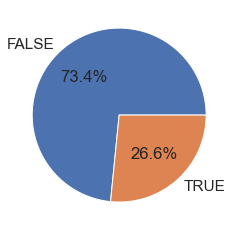

TRUE     4458
FALSE    4458
Name: ratingName, dtype: int64


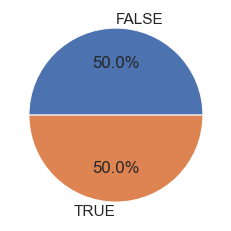



MNB_pipe : 
Time = 51.16661 s
meilleur score 0.804 

meilleurs paramètres {'mnb__alpha': 0.5, 'mnb__fit_prior': True} 



BNB_pipe : 
Time = 83.23983 s
meilleur score 0.812 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 



RFC_pipe : 
Time = 129.86480 s
meilleur score 0.748 

meilleurs paramètres {'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 500} 

Pipeline      Score
----------  -------
BNB_pipe      0.801
MNB_pipe      0.793
RFC_pipe      0.726


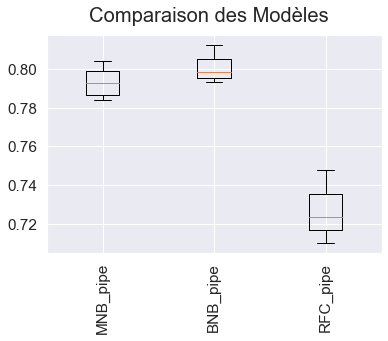

meilleur score 0.812 

meilleurs paramètres {'bnb__alpha': 0.5, 'bnb__fit_prior': True} 

meilleur estimateur Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(columns='text')),
                                                                 ('cleaner',
                                                                  TextNormalizer(filterByWordTags=['NN',
                                                                                                   'VB'],
                                                                                 lowercase=True,
                                                                                 removestopwords=True)),
                                                                 ('tfidf_vectorizer',
                                               

In [34]:
filename7 = 'model_TRUEvsFALSE.pkl'
X_test7, y_test7 =RunExperimentations7(classificationTask=ClassificationTask.TRUEvsFalse.value,
                                    split_ratio=0.75,
                                    filename=filename7)